# Running DataWrangling_12 processes but on all counties in US
# Running processes in DataWrangling11 but with PM2.5 pollutants only
* PM2.5 is the second most frequent recorded pollutant from EPA

# Rerun DataWrangling8 processes with alernative datasets from DataWrangling 9

In [1]:
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import klib

from IPython.core.display import display

# pd.set_option('display.max_columns', None)
# pd.reset_optio('max_rows')
#np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

# Load data and constants

In [2]:
def remove_col(df, col_name):
    '''Returns a dataframe with removed column or columns from old dataframe'''
    new_df = df.copy()

    if(type(col_name) != str and len(col_name) > 1):
        for index in col_name:
            new_df = new_df.drop(str(index), axis=1)
    else:
        new_df = new_df.drop(str(col_name), axis=1)
    return new_df

    return NE_States
def get_df_with_geofips(df, state_code, county_code):
    ''' Returns dataframe with geofips column '''
    state_code = df[state_code].astype(str).values
    county_code = df[county_code].astype(str).values

    geofips = []
    for stateID, countyID in zip(state_code, county_code):
        id = ''
        stateLen = len(stateID)
        countyLen = len(countyID)
        if(stateLen < 2):
            id += '0' + stateID
        else:
            id += stateID
        if(countyLen == 1):
            id += '00' + countyID
        elif(countyLen == 2):
            id += '0' + countyID
        else:
            id += countyID
        geofips.append(id)

    df.insert(loc=0, column='GeoFIPS', value=geofips)
    return df

In [3]:
pm2_5_2017 = pd.read_csv('../../data/raw/daily_pm25_2017.csv')
pm2_5_2018 = pd.read_csv('../../data/raw/daily_pm25_2018.csv')
pm2_5_2019 = pd.read_csv('../../data/raw/daily_pm25_2019.csv')

county_incomes = r'../../data/processed/county_incomes_2017_2019'
county_incomes_2017_2019 = pd.read_csv(county_incomes)

educ_vehicle = r'../../data/processed/clean_edu_vehicle_2017_2019.csv'
educ_vehicle_2017_2019 = pd.read_csv(educ_vehicle)

pov_rate = r'../../data/processed/clean_pov_rate_2017_2019.csv'
pov_rate_2017_2019 = pd.read_csv(pov_rate)

unemploy_county_rate = r'../../data/processed/clean_UE_rate_2017_2019.csv'
unemploy_rate_2017_2019 = pd.read_csv(unemploy_county_rate)

county_dem_ratio = r'../../data/processed/clean_county_dem_ratio_2017_2019.csv'
county_dem_ratio_2017_2019 = pd.read_csv(county_dem_ratio)

## Retrieve pm2_5 data

In [4]:
print(pm2_5_2017.shape)

(450385, 29)


In [5]:
# add GeoFIPS for NE aqi counties
pm2_5_2017 = get_df_with_geofips(pm2_5_2017, 'State Code', 'County Code')
pm2_5_2018 = get_df_with_geofips(pm2_5_2018, 'State Code', 'County Code')
pm2_5_2019 = get_df_with_geofips(pm2_5_2019, 'State Code', 'County Code')

In [6]:
# Remove unnecessary columns

pm2_5_2017.columns
cols_to_remove = ['State Code', 'County Code', 'Site Num', 'Parameter Code',
       'POC', 'Latitude', 'Longitude', 'Datum', 'Parameter Name',
       'Sample Duration', 'Pollutant Standard', 'Date Local',
       'Units of Measure', 'Event Type', 'Observation Count',
       'Observation Percent', 'Arithmetic Mean', '1st Max Value',
       '1st Max Hour', 'Method Code', 'Method Name', 'Local Site Name',
       'Address', 'CBSA Name', 'Date of Last Change']

pm2_5_2017 = remove_col(pm2_5_2017, cols_to_remove)
pm2_5_2018 = remove_col(pm2_5_2018, cols_to_remove)
pm2_5_2019 = remove_col(pm2_5_2019, cols_to_remove)

In [7]:
pm2_5_2017.rename(columns={'AQI':'AQI_2017'}, inplace=True)
pm2_5_2018.rename(columns={'AQI':'AQI_2018'}, inplace=True)
pm2_5_2019.rename(columns={'AQI':'AQI_2019'}, inplace=True)

In [8]:
print(pm2_5_2017.columns)
average_pm2_5_2017 = pm2_5_2017.groupby(['GeoFIPS', 'State Name', 'County Name'], as_index=False)[['AQI_2017']].mean()
average_pm2_5_2018 = pm2_5_2018.groupby(['GeoFIPS', 'State Name', 'County Name'], as_index=False)[['AQI_2018']].mean()
average_pm2_5_2019 = pm2_5_2019.groupby(['GeoFIPS', 'State Name', 'County Name'], as_index=False)[['AQI_2019']].mean()

display(average_pm2_5_2017)
display(average_pm2_5_2018)
display(average_pm2_5_2019)


Index(['GeoFIPS', 'AQI_2017', 'State Name', 'County Name', 'City Name'], dtype='object')


,GeoFIPS,State Name,County Name,AQI_2017
0,01003,Alabama,Baldwin,30.218182
1,01027,Alabama,Clay,32.457627
2,01033,Alabama,Colbert,30.487395
3,01049,Alabama,DeKalb,32.886957
4,01055,Alabama,Etowah,35.761062
...,...,...,...,...
616,72059,Puerto Rico,Guayanilla,30.063830
617,72061,Puerto Rico,Guaynabo,38.438596
618,72113,Puerto Rico,Ponce,36.872340
619,78010,Virgin Islands,St Croix,24.346154


,GeoFIPS,State Name,County Name,AQI_2018
0,01003,Alabama,Baldwin,29.495327
1,01027,Alabama,Clay,28.990909
2,01033,Alabama,Colbert,30.900826
3,01049,Alabama,DeKalb,29.149123
4,01055,Alabama,Etowah,32.000000
...,...,...,...,...
630,72061,Puerto Rico,Guaynabo,33.519380
631,72113,Puerto Rico,Ponce,27.795699
632,78010,Virgin Islands,St Croix,29.090909
633,78030,Virgin Islands,St Thomas,33.207650


,GeoFIPS,State Name,County Name,AQI_2019
0,01003,Alabama,Baldwin,31.112150
1,01027,Alabama,Clay,31.149533
2,01033,Alabama,Colbert,29.852941
3,01049,Alabama,DeKalb,31.046296
4,01055,Alabama,Etowah,34.377193
...,...,...,...,...
629,72057,Puerto Rico,Guayama,21.535714
630,72061,Puerto Rico,Guaynabo,29.863636
631,72113,Puerto Rico,Ponce,25.734513
632,78010,Virgin Islands,St Croix,24.877193


In [9]:
# Merge avg northeast pm2_5 data

avg_pm2_5_2017_2018 = pd.merge(average_pm2_5_2017, average_pm2_5_2018, how='inner')
avg_pm2_5_2017_2019 = pd.merge(avg_pm2_5_2017_2018, average_pm2_5_2019, how='inner')
avg_pm2_5_2017_2019

avg_pm2_5_2017_2019['GeoFIPS'] = pd.to_numeric(avg_pm2_5_2017_2019['GeoFIPS'])
avg_pm2_5_2017_2019.dtypes

GeoFIPS          int64
State Name      object
County Name     object
AQI_2017       float64
AQI_2018       float64
AQI_2019       float64
dtype: object

* Have 3 datasets for individuals years 2017, 2018, 2019

In [10]:
display(avg_pm2_5_2017_2019)
display(unemploy_rate_2017_2019)
display(pov_rate_2017_2019)
display(educ_vehicle_2017_2019)
display(county_dem_ratio_2017_2019)
display(county_incomes_2017_2019)


,GeoFIPS,State Name,County Name,AQI_2017,AQI_2018,AQI_2019
0,1003,Alabama,Baldwin,30.218182,29.495327,31.112150
1,1027,Alabama,Clay,32.457627,28.990909,31.149533
2,1033,Alabama,Colbert,30.487395,30.900826,29.852941
3,1049,Alabama,DeKalb,32.886957,29.149123,31.046296
4,1055,Alabama,Etowah,35.761062,32.000000,34.377193
...,...,...,...,...,...,...
596,72021,Puerto Rico,Bayamon,61.784483,47.798046,28.316129
597,72053,Puerto Rico,Fajardo,37.972222,20.625000,27.546218
598,72061,Puerto Rico,Guaynabo,38.438596,33.519380,29.863636
599,72113,Puerto Rico,Ponce,36.872340,27.795699,25.734513


,GeoFIPS,Stabr,area_name,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019
0,1001,AL,"Autauga County, AL",26075,25062,1013,3.9,26196,25261,935,3.6,26172,25458,714,2.7
1,1003,AL,"Baldwin County, AL",92456,88711,3745,4.1,95233,91809,3424,3.6,97328,94675,2653,2.7
2,1005,AL,"Barbour County, AL",8349,7863,486,5.8,8414,7987,427,5.1,8537,8213,324,3.8
3,1007,AL,"Bibb County, AL",8583,8208,375,4.4,8605,8268,337,3.9,8685,8419,266,3.1
4,1009,AL,"Blount County, AL",24822,23824,998,4.0,25069,24201,868,3.5,25331,24655,676,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,72145,PR,"Vega Baja Municipio, PR",13414,11746,1668,12.4,13117,11750,1367,10.4,13037,11791,1246,9.6
3214,72147,PR,"Vieques Municipio, PR",3027,2589,438,14.5,2718,2269,449,16.5,2585,2406,179,6.9
3215,72149,PR,"Villalba Municipio, PR",7557,6090,1467,19.4,7311,6154,1157,15.8,7406,6231,1175,15.9
3216,72151,PR,"Yabucoa Municipio, PR",9000,7512,1488,16.5,8762,7509,1253,14.3,8691,7552,1139,13.1


,GeoFIPS,Postal Code,Name,"Poverty Estimate, All Ages_2017",90% CI LB All Ages_2017,90% CI UB All Ages_2017,"Poverty Percent, All Ages_2017",90% CI LB percent_2017,90% CI UB percent_2017,"Poverty Estimate, Age 0-17_2017",...,90% CI UB 0-17 percent_2019,"Poverty Estimate, Age 5-17 in Families_2019",90% CI LB 5-17 fam_2019,90% CI UB 5-17 fam_2019,"Poverty Percent, Age 5-17 in Families_2019",90% CI LB 5-17 percent_2019,90% CI UB percent 5-17 percent_2019,Median Household Income_2019,90% CI Lower Bound LB medh inc_2019,90% CI UB medh inc_2019
0,1001,AL,Autauga County,7390.0,6147.0,8633.0,13.4,11.1,15.7,2542.0,...,20.3,1376.0,902.0,1850.0,14.4,9.4,19.4,58233.0,52517.0,63949.0
1,1003,AL,Baldwin County,21199.0,17444.0,24954.0,10.1,8.3,11.9,6734.0,...,17.4,4641.0,3295.0,5987.0,13.3,9.4,17.2,59871.0,54593.0,65149.0
2,1005,AL,Barbour County,7414.0,6325.0,8503.0,33.4,28.5,38.3,2606.0,...,50.8,1468.0,1114.0,1822.0,39.5,30.0,49.0,35972.0,31822.0,40122.0
3,1007,AL,Bibb County,4137.0,3187.0,5087.0,20.2,15.5,24.9,1242.0,...,33.1,808.0,566.0,1050.0,25.2,17.7,32.7,47918.0,42291.0,53545.0
4,1009,AL,Blount County,7343.0,5805.0,8881.0,12.8,10.1,15.5,2484.0,...,25.3,2067.0,1641.0,2493.0,21.4,17.0,25.8,52902.0,46777.0,59027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,56037,WY,Sweetwater County,4253.0,3540.0,4966.0,10.0,8.3,11.7,1509.0,...,13.0,644.0,416.0,872.0,8.2,5.3,11.1,80639.0,73437.0,87841.0
3002,56039,WY,Teton County,1348.0,1021.0,1675.0,5.8,4.4,7.2,296.0,...,7.8,142.0,83.0,201.0,4.7,2.7,6.7,98837.0,86531.0,111143.0
3003,56041,WY,Uinta County,2067.0,1623.0,2511.0,10.2,8.0,12.4,697.0,...,13.1,336.0,193.0,479.0,7.8,4.5,11.1,70756.0,63191.0,78321.0
3004,56043,WY,Washakie County,845.0,632.0,1058.0,10.7,8.0,13.4,260.0,...,18.9,160.0,94.0,226.0,12.3,7.2,17.4,55122.0,50050.0,60194.0


,GeoFIPS,NAME,state,county,POP_2017,EDU_TOT_2017,LESS_HS_TOT_2017,HS_TOT_2017,COL_OR_ASSOC_TOT_2017,BACH_TOT_2017,...,BACH_TOT_2019,GRAD_TOT_2019,VEHICLE_TOT_2019,EDU_TOT_ratio_2019,LESS_HS_TOT_ratio_2019,HS_TOT_ratio_2019,COL_OR_ASSOC_TOT_ratio_2019,BACH_TOT_ratio_2019,GRAD_TOT_ratio_2019,VEHICLE_TOT_ratio_2019
0,36089,"St. Lawrence County, New York",36,89,109623,72555.0,9164.0,25858.0,20091.0,8279.0,...,8684.0,7733.0,33650,67.044737,8.564136,23.762762,19.480230,8.060145,7.177464,31.232597
1,36091,"Saratoga County, New York",36,91,229869,164414.0,10656.0,39033.0,45561.0,37886.0,...,40148.0,30363.0,104085,72.095118,4.492676,17.754924,19.172290,17.466056,13.209172,45.281320
2,36093,"Schenectady County, New York",36,93,155565,107453.0,10085.0,32144.0,35263.0,17210.0,...,22627.0,15566.0,59970,70.183324,5.047682,20.198456,20.343982,14.569959,10.023245,38.615831
3,36101,"Steuben County, New York",36,101,96281,68011.0,6510.0,25920.0,20685.0,7451.0,...,8066.0,8475.0,35505,71.044989,6.093585,25.791841,21.817171,8.456788,8.885604,37.225175
4,36103,"Suffolk County, New York",36,103,1492953,1036946.0,102621.0,277080.0,279213.0,208064.0,...,214035.0,182346.0,629360,70.148605,6.397598,18.389192,18.517663,14.495114,12.349037,42.622211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,36079,"Putnam County, New York",36,79,99323,71447.0,5090.0,20597.0,18095.0,14929.0,...,15240.0,12261.0,42420,73.443857,5.721115,19.355167,20.396664,15.500407,12.470504,43.144833
832,36081,"Queens County, New York",36,81,2358582,1695302.0,304984.0,493794.0,372885.0,335990.0,...,334272.0,207624.0,387870,72.484558,12.328372,19.812340,16.300805,14.831103,9.211938,17.209159
833,36083,"Rensselaer County, New York",36,83,159722,111047.0,9095.0,31730.0,34954.0,20143.0,...,20896.0,18203.0,65615,70.327759,5.902441,19.919478,19.870963,13.165820,11.469058,41.341659
834,36085,"Richmond County, New York",36,85,479458,334079.0,39031.0,100730.0,83679.0,66108.0,...,71914.0,48875.0,128740,70.041143,7.701258,20.426427,16.545240,15.103446,10.264773,27.038096


,GeoFIPS,STNAME,CTYNAME,TOT_POP_2017,TOT_MALE_2017,TOT_FEMALE_2017,WA_MALE_2017,WA_FEMALE_2017,BA_MALE_2017,BA_FEMALE_2017,...,HWAC_MALE_ratio_2019,HWAC_FEMALE_ratio_2019,HBAC_MALE_ratio_2019,HBAC_FEMALE_ratio_2019,HIAC_MALE_ratio_2019,HIAC_FEMALE_ratio_2019,HAAC_MALE_ratio_2019,HAAC_FEMALE_ratio_2019,HNAC_MALE_ratio_2019,HNAC_FEMALE_ratio_2019
0,1001,Alabama,Autauga County,55390,27010,28380,20876,21705,5139,5636,...,1.392543,1.229662,0.159301,0.166461,0.071596,0.048327,0.026849,0.034008,0.028638,0.019689
1,1003,Alabama,Baldwin County,212521,103218,109303,90360,95215,9279,9973,...,2.304308,2.081224,0.120053,0.125877,0.118262,0.088248,0.030909,0.029117,0.024638,0.015679
2,1005,Alabama,Barbour County,25157,13230,11927,6533,5918,6360,5744,...,2.061897,1.652759,0.255205,0.202544,0.247104,0.105323,0.004051,0.000000,0.056712,0.032407
3,1007,Alabama,Bibb County,22550,12056,10494,8853,8453,2996,1848,...,1.299455,1.129767,0.142895,0.084844,0.026793,0.066982,0.022327,0.004465,0.075913,0.013396
4,1009,Alabama,Blount County,57787,28449,29338,27301,28144,488,450,...,4.831737,4.350984,0.131429,0.100301,0.115865,0.114136,0.031128,0.036316,0.058797,0.036316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Wyoming,Sweetwater County,43464,22438,21026,21098,19776,342,254,...,7.843091,7.077911,0.196018,0.172402,0.500673,0.462886,0.077935,0.085020,0.037787,0.021255
3138,56039,Wyoming,Teton County,23384,12133,11251,11592,10705,95,56,...,7.577566,6.725196,0.106546,0.098023,0.447494,0.345210,0.068190,0.063928,0.051142,0.029833
3139,56041,Wyoming,Uinta County,20431,10339,10092,9884,9625,79,84,...,4.153070,4.153070,0.084050,0.113715,0.405419,0.548799,0.014832,0.059330,0.039553,0.009888
3140,56043,Wyoming,Washakie County,8010,4055,3955,3865,3735,23,18,...,6.559898,6.265215,0.089686,0.115311,0.691864,0.755926,0.089686,0.102498,0.051249,0.025625


,GeoFIPS,GeoName,Personal income (thousands of dollars) 2017,Personal income (thousands of dollars) 2018,Personal income (thousands of dollars) 2019,Per capita personal income (dollars) 2017,Per capita personal income (dollars) 2018,Per capita personal income (dollars) 2019
0,0,United States,1.693758e+10,1.783926e+10,1.854226e+10,52118.0,54606.0,56490.0
1,1000,Alabama,1.999998e+08,2.087527e+08,2.164490e+08,41030.0,42710.0,44145.0
2,1001,"Autauga, AL",2.276561e+06,2.360366e+06,2.453617e+06,41101.0,42504.0,43917.0
3,1003,"Baldwin, AL",9.471242e+06,1.006597e+07,1.060026e+07,44566.0,46205.0,47485.0
4,1005,"Barbour, AL",8.381840e+05,8.721890e+05,8.828340e+05,33318.0,35067.0,35763.0
...,...,...,...,...,...,...,...,...
3193,94000,Plains,1.055029e+09,1.107630e+09,1.146515e+09,49609.0,51879.0,53509.0
3194,95000,Southeast,3.818755e+09,4.022276e+09,4.173677e+09,45657.0,47715.0,49159.0
3195,96000,Southwest,1.924648e+09,2.051027e+09,2.144764e+09,46531.0,49045.0,50670.0
3196,97000,Rocky Mountain,6.029942e+08,6.476007e+08,6.803901e+08,49991.0,52936.0,54873.0


## Make one df of 2017
* Cleaning for datasets were done in Data_Wrangling4 and Data_Wrangling7 files
* So only transforming datasets into one will work

In [11]:
avg_pm2_5_2017 = avg_pm2_5_2017_2019.iloc[:,:4]
unemploy_rate_2017 = unemploy_rate_2017_2019.iloc[:, [0, 3, 4, 5, 6]]

pov_col_2017 = list(pov_rate_2017_2019.columns[0:1]) + list(pov_rate_2017_2019.columns[3:24])
pov_rate_2017 = pov_rate_2017_2019.loc[:, pov_col_2017]

county_incomes_2017 = county_incomes_2017_2019.iloc[:, [0, 2, 5]]

educ_vehicle_2017_col = list(educ_vehicle_2017_2019.columns[0:1]) + list(educ_vehicle_2017_2019.columns[4:19])
educ_vehicle_2017 = educ_vehicle_2017_2019.loc[:, educ_vehicle_2017_col]

dem_ratio_2017_col = list(county_dem_ratio_2017_2019.columns[0:1]) + list(county_dem_ratio_2017_2019.columns[3:148])
dem_ratio_2017 = county_dem_ratio_2017_2019.loc[:, dem_ratio_2017_col]

In [12]:
avg_pm2_5_unemploy_2017 = pd.merge(avg_pm2_5_2017, unemploy_rate_2017, how='inner')
avg_pm2_5_unemploy_pov_2017 = pd.merge(avg_pm2_5_unemploy_2017, pov_rate_2017, how='inner')
avg_pm2_5_unemploy_pov_inc_2017 = pd.merge(avg_pm2_5_unemploy_pov_2017, county_incomes_2017, how='inner')
avg_pm2_5_unemploy_pov_inc_educ_veh_2017 = pd.merge(avg_pm2_5_unemploy_pov_inc_2017, educ_vehicle_2017, how='inner')
df_2017 = pd.merge(avg_pm2_5_unemploy_pov_inc_educ_veh_2017, dem_ratio_2017, how='inner')

df_2017

,GeoFIPS,State Name,County Name,AQI_2017,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,"Poverty Estimate, All Ages_2017",90% CI LB All Ages_2017,...,HWAC_MALE_ratio_2017,HWAC_FEMALE_ratio_2017,HBAC_MALE_ratio_2017,HBAC_FEMALE_ratio_2017,HIAC_MALE_ratio_2017,HIAC_FEMALE_ratio_2017,HAAC_MALE_ratio_2017,HAAC_FEMALE_ratio_2017,HNAC_MALE_ratio_2017,HNAC_FEMALE_ratio_2017
0,1003,Alabama,Baldwin,30.218182,92456,88711,3745,4.1,21199.0,17444.0,...,2.243072,2.000743,0.121870,0.127046,0.112930,0.076228,0.019763,0.026350,0.020704,0.018822
1,1049,Alabama,DeKalb,32.886957,29688,28357,1331,4.5,13785.0,11467.0,...,6.708008,5.977295,0.260369,0.214175,0.531937,0.433949,0.085390,0.086790,0.334561,0.258969
2,1055,Alabama,Etowah,35.761062,43233,41251,1982,4.6,18257.0,15600.0,...,1.611541,1.460095,0.158242,0.145621,0.148534,0.121351,0.047570,0.036891,0.138826,0.114555
3,1069,Alabama,Houston,34.838983,44882,42923,1959,4.4,17095.0,15498.0,...,1.517561,1.323076,0.184905,0.175324,0.114967,0.100596,0.040238,0.036406,0.025868,0.019161
4,1073,Alabama,Jefferson,38.548263,311481,298227,13254,4.3,107752.0,99555.0,...,1.840361,1.588996,0.169952,0.171771,0.056701,0.045482,0.016980,0.013038,0.017890,0.013645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,55087,Wisconsin,Outagamie,23.962617,104011,100888,3123,3.0,13045.0,11209.0,...,2.025122,1.820080,0.092565,0.077496,0.191587,0.170599,0.039824,0.039824,0.009149,0.011840
404,55089,Wisconsin,Ozaukee,22.023499,49172,47823,1349,2.7,4244.0,3457.0,...,1.437084,1.295750,0.068971,0.050880,0.064448,0.067840,0.019221,0.026005,0.003392,0.002261
405,55133,Wisconsin,Waukesha,31.758350,226155,219636,6519,2.9,19090.0,16633.0,...,2.266406,2.199307,0.076328,0.092293,0.074832,0.076328,0.031429,0.029933,0.013719,0.009978
406,56021,Wyoming,Laramie,16.270341,48230,46472,1758,3.6,9294.0,7767.0,...,7.126666,6.550312,0.264289,0.250058,0.433028,0.424896,0.113848,0.112831,0.044726,0.028462


* df_2017 contains data on NorthEastern counties of the US
* The columns of df_2017 go from average aqi, unemployment rate, poverty rate, education attainment ratio, total vehicle ratio, demographic ratios


<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

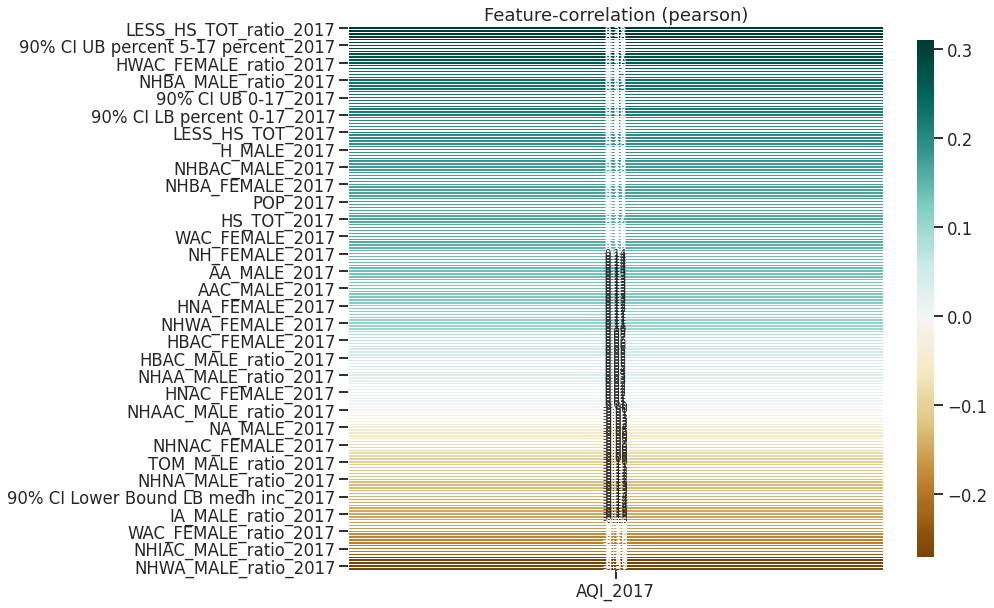

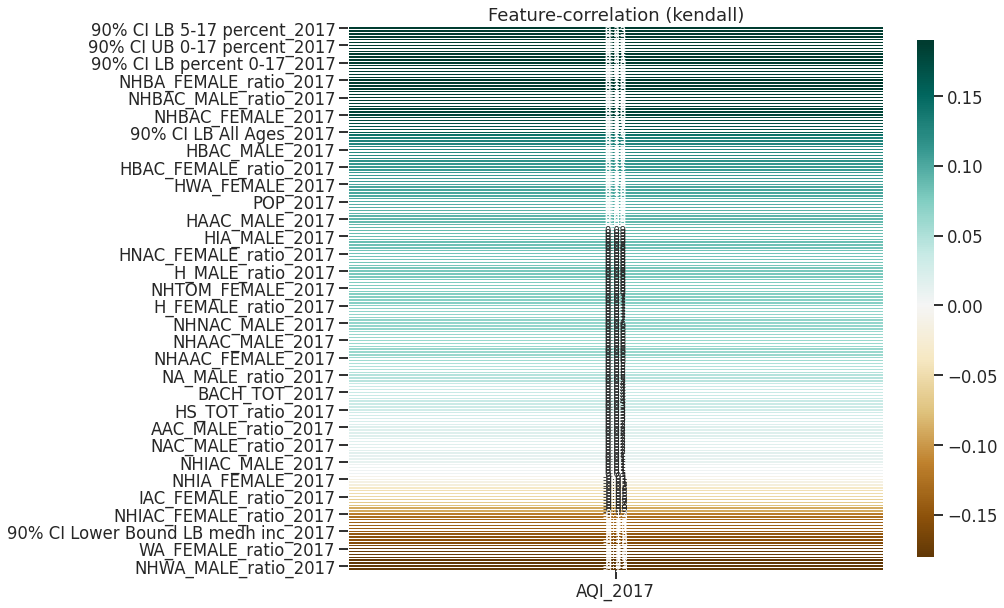

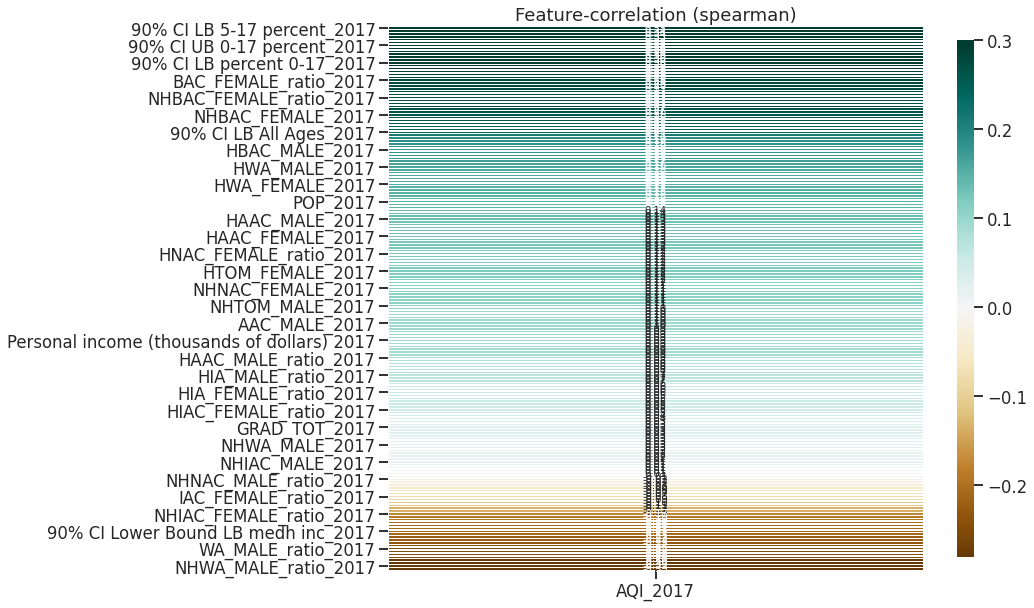

In [13]:
klib.corr_plot(df_2017, target='AQI_2017', method='pearson')
klib.corr_plot(df_2017, target='AQI_2017', method='kendall')
klib.corr_plot(df_2017, target='AQI_2017', method='spearman')

## Make one df of 2018
* Cleaning for datasets were done in Data_Wrangling4 and Data_Wrangling7 files
* So only transforming datasets into one will work

In [14]:
avg_pm2_5_2018 = avg_pm2_5_2017_2019.iloc[:, [0, 1, 2, 4]]

unemploy_col_2018 = list(unemploy_rate_2017_2019.columns[0:1]) + list(unemploy_rate_2017_2019.columns[7:11])
unemploy_rate_2018 = unemploy_rate_2017_2019.loc[:, unemploy_col_2018]

pov_col_2018 = list(pov_rate_2017_2019.columns[0:1]) + list(pov_rate_2017_2019.columns[24:45])
pov_rate_2018 = pov_rate_2017_2019.loc[:, pov_col_2018]

incomes_2018 = county_incomes_2017_2019.iloc[:, [0, 3, 6]]

educ_vehicle_2018_col = list(educ_vehicle_2017_2019.columns[0:1]) + list(educ_vehicle_2017_2019.columns[19:34])
educ_vehicle_2018 = educ_vehicle_2017_2019.loc[:, educ_vehicle_2018_col]

county_dem_ratio_2018_col = list(county_dem_ratio_2017_2019.columns[0:1]) + list(county_dem_ratio_2017_2019.columns[148:293])
county_dem_ratio_2018 = county_dem_ratio_2017_2019.loc[:, county_dem_ratio_2018_col]

In [15]:
avg_pm2_5_unemploy_2018 = pd.merge(avg_pm2_5_2018, unemploy_rate_2018, how='inner')
avg_pm2_5_unemploy_pov_2018 = pd.merge(avg_pm2_5_unemploy_2018, pov_rate_2018, how='inner')
avg_pm2_5_unemploy_pov_inc_2018 = pd.merge(avg_pm2_5_unemploy_pov_2018, incomes_2018, how='inner')
avg_pm2_5_unemploy_pov_inc_educ_veh_2018 = pd.merge(avg_pm2_5_unemploy_pov_inc_2018, educ_vehicle_2018, how='inner')
df_2018 = pd.merge(avg_pm2_5_unemploy_pov_inc_educ_veh_2018, county_dem_ratio_2018, how='inner')

df_2018

,GeoFIPS,State Name,County Name,AQI_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,"Poverty Estimate, All Ages_2018",90% CI LB All Ages_2018,...,HWAC_MALE_ratio_2018,HWAC_FEMALE_ratio_2018,HBAC_MALE_ratio_2018,HBAC_FEMALE_ratio_2018,HIAC_MALE_ratio_2018,HIAC_FEMALE_ratio_2018,HAAC_MALE_ratio_2018,HAAC_FEMALE_ratio_2018,HNAC_MALE_ratio_2018,HNAC_FEMALE_ratio_2018
0,1003,Alabama,Baldwin,29.495327,95233,91809,3424,3.6,21069.0,17390.0,...,2.281334,2.053201,0.120722,0.120722,0.118427,0.085378,0.028459,0.025705,0.022951,0.014230
1,1049,Alabama,DeKalb,29.149123,30289,29153,1136,3.8,14975.0,13282.0,...,6.814458,6.082037,0.263280,0.207263,0.540563,0.441133,0.089627,0.096629,0.333301,0.261879
2,1055,Alabama,Etowah,32.000000,43252,41502,1750,4.0,17509.0,15140.0,...,1.727885,1.528101,0.158852,0.135463,0.159827,0.128641,0.044830,0.038008,0.138387,0.118896
3,1069,Alabama,Houston,31.280702,45580,43764,1816,4.0,17032.0,14978.0,...,1.532882,1.356304,0.194712,0.189940,0.113582,0.102128,0.038179,0.037224,0.024816,0.027680
4,1073,Alabama,Jefferson,37.591481,315793,304248,11545,3.7,103604.0,95029.0,...,1.881780,1.642027,0.173180,0.182885,0.057474,0.049588,0.018804,0.014255,0.016833,0.013497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,55087,Wisconsin,Outagamie,26.414286,103341,100447,2894,2.8,13196.0,11058.0,...,2.076745,1.897484,0.093643,0.081871,0.196919,0.179795,0.044949,0.033712,0.011772,0.009097
404,55089,Wisconsin,Ozaukee,26.106742,49249,48012,1237,2.5,3674.0,2883.0,...,1.481041,1.356404,0.076354,0.053897,0.064003,0.070740,0.022457,0.033686,0.006737,0.001123
405,55133,Wisconsin,Waukesha,36.182278,225674,219707,5967,2.6,19937.0,17306.0,...,2.295775,2.248573,0.080244,0.095647,0.077760,0.080741,0.032545,0.031303,0.011925,0.009689
406,56021,Wyoming,Laramie,14.522606,48190,46397,1793,3.7,8839.0,7212.0,...,7.079351,6.603955,0.275123,0.258939,0.419764,0.412684,0.138573,0.123401,0.044505,0.032367


* df_2018 contains data on NorthEastern counties of the US
* The columns of df_2018 go from average aqi, unemployment rate, poverty rate, education attainment ratio, total vehicle ratio, demographic ratios

<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

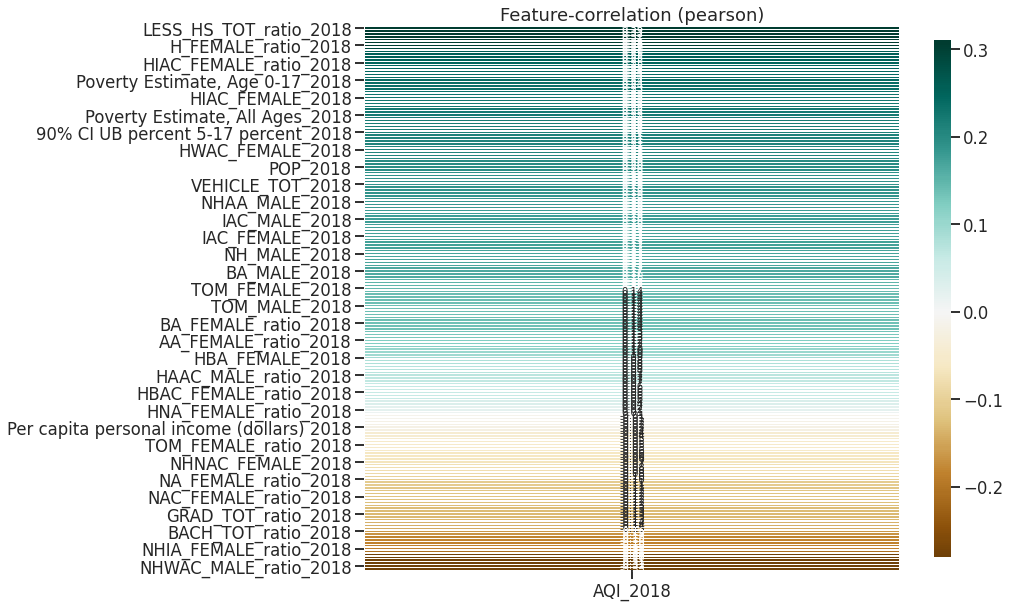

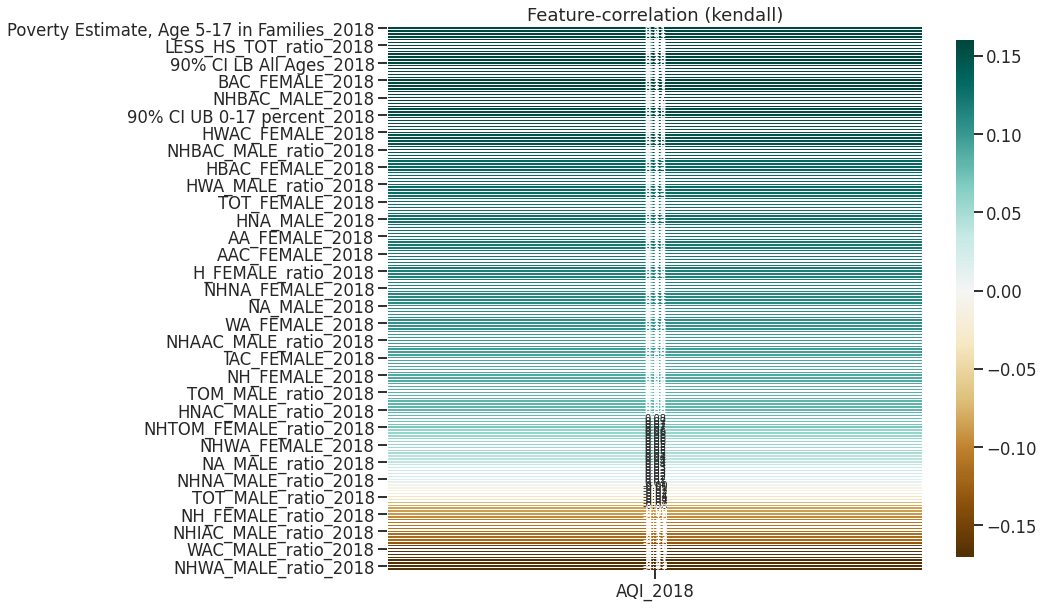

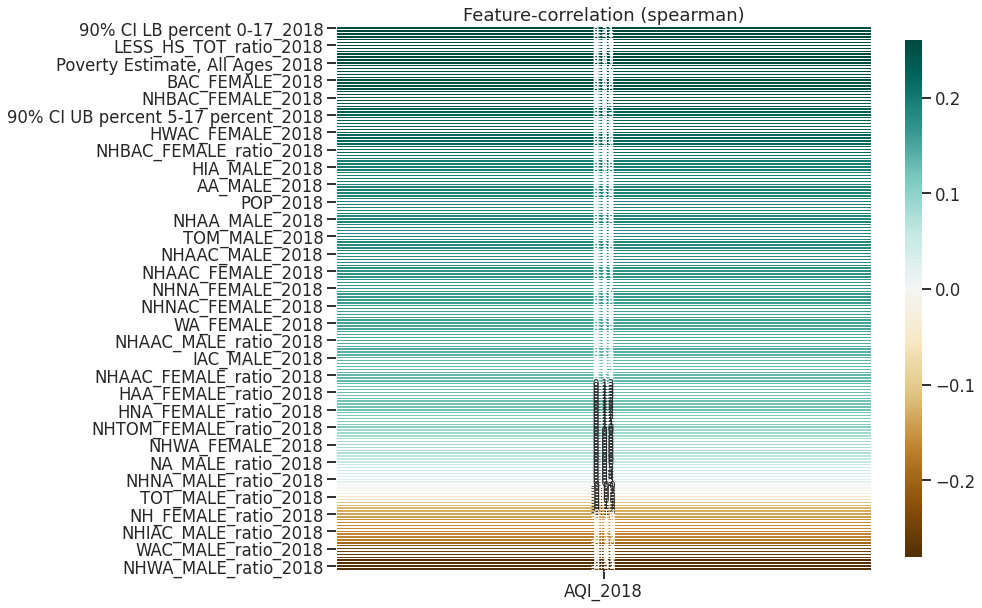

In [16]:
klib.corr_plot(df_2018, target='AQI_2018', method='pearson')
klib.corr_plot(df_2018, target='AQI_2018', method='kendall')
klib.corr_plot(df_2018, target='AQI_2018', method='spearman')

## Make one df of 2019
* Cleaning for datasets were done in Data_Wrangling4 and Data_Wrangling7 files
* So only transforming datasets into one will work

In [17]:
avg_pm2_5_2019 = avg_pm2_5_2017_2019.iloc[:,[0, 1, 2, 5]]

unemploy_col_2019 = list(unemploy_rate_2017_2019.columns[0:1]) + list(unemploy_rate_2017_2019.columns[11:])
unemploy_rate_2019 = unemploy_rate_2017_2019.loc[:, unemploy_col_2019]

pov_col_2019 = list(pov_rate_2017_2019.columns[0:1]) + list(pov_rate_2017_2019.columns[45:])
pov_rate_2019 = pov_rate_2017_2019.loc[:, pov_col_2019]

incomes_2019 = county_incomes_2017_2019.iloc[:, [0, 4, 7]]

educ_vehicle_2019_col = list(educ_vehicle_2017_2019.columns[0:1]) + list(educ_vehicle_2017_2019.columns[34:])
educ_vehicle_2019 = educ_vehicle_2017_2019.loc[:, educ_vehicle_2019_col]

county_dem_ratio_2019_col = list(county_dem_ratio_2017_2019.columns[0:1]) + list(county_dem_ratio_2017_2019.columns[293:])
county_dem_ratio_2019 = county_dem_ratio_2017_2019.loc[:, county_dem_ratio_2019_col]

In [18]:
avg_pm2_5_unemploy_2019 = pd.merge(avg_pm2_5_2019, unemploy_rate_2019, how='inner')
avg_pm2_5_unemploy_pov_2019 = pd.merge(avg_pm2_5_unemploy_2019, pov_rate_2019, how='inner')
avg_pm2_5_unemploy_pov_inc_2019 = pd.merge(avg_pm2_5_unemploy_pov_2019, incomes_2019, how='inner')
avg_pm2_5_unemploy_pov_inc_educ_veh_2019 = pd.merge(avg_pm2_5_unemploy_pov_inc_2019, educ_vehicle_2019, how='inner')
df_2019 = pd.merge(avg_pm2_5_unemploy_pov_inc_educ_veh_2019, county_dem_ratio_2019, how='inner')

df_2019

,GeoFIPS,State Name,County Name,AQI_2019,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,"Poverty Estimate, All Ages_2019",90% CI LB All Ages_2019,...,HWAC_MALE_ratio_2019,HWAC_FEMALE_ratio_2019,HBAC_MALE_ratio_2019,HBAC_FEMALE_ratio_2019,HIAC_MALE_ratio_2019,HIAC_FEMALE_ratio_2019,HAAC_MALE_ratio_2019,HAAC_FEMALE_ratio_2019,HNAC_MALE_ratio_2019,HNAC_FEMALE_ratio_2019
0,1003,Alabama,Baldwin,31.112150,97328,94675,2653,2.7,22360.0,18541.0,...,2.304308,2.081224,0.120053,0.125877,0.118262,0.088248,0.030909,0.029117,0.024638,0.015679
1,1049,Alabama,DeKalb,31.046296,31052,30182,870,2.8,12848.0,10674.0,...,6.928810,6.186288,0.269881,0.222337,0.546754,0.458658,0.099283,0.089494,0.321620,0.267084
2,1055,Alabama,Etowah,34.377193,42723,41295,1428,3.3,18801.0,16286.0,...,1.756170,1.607541,0.161341,0.142762,0.166230,0.139829,0.041069,0.028357,0.142762,0.122228
3,1069,Alabama,Houston,33.400000,46234,44844,1390,3.0,20207.0,18225.0,...,1.564005,1.354338,0.189834,0.192667,0.114278,0.100111,0.039667,0.034945,0.033056,0.033056
4,1073,Alabama,Jefferson,38.175439,318755,309664,9091,2.9,104288.0,95487.0,...,1.931601,1.694117,0.178872,0.190260,0.060586,0.053297,0.021106,0.013666,0.017766,0.013818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,55087,Wisconsin,Outagamie,31.552408,103135,100059,3076,3.0,13110.0,11133.0,...,2.125768,1.951194,0.096336,0.096336,0.212364,0.185752,0.045240,0.036725,0.011709,0.011177
404,55089,Wisconsin,Ozaukee,27.917355,49030,47625,1405,2.9,3926.0,3094.0,...,1.510855,1.398774,0.085182,0.066128,0.078457,0.078457,0.015691,0.035866,0.004483,0.003362
405,55133,Wisconsin,Waukesha,36.418660,224731,218151,6580,2.9,18915.0,16096.0,...,2.343406,2.297884,0.083870,0.098467,0.085602,0.085354,0.036368,0.037111,0.012618,0.012123
406,56021,Wyoming,Laramie,13.535610,48491,46813,1678,3.5,9194.0,7774.0,...,7.128643,6.737688,0.269347,0.271357,0.423116,0.405025,0.135678,0.125628,0.053266,0.045226


* df_2019 contains data on NorthEastern counties of the US
* The columns of df_2019 go from average aqi, unemployment rate, poverty rate, education attainment ratio, total vehicle ratio, demographic ratios

<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

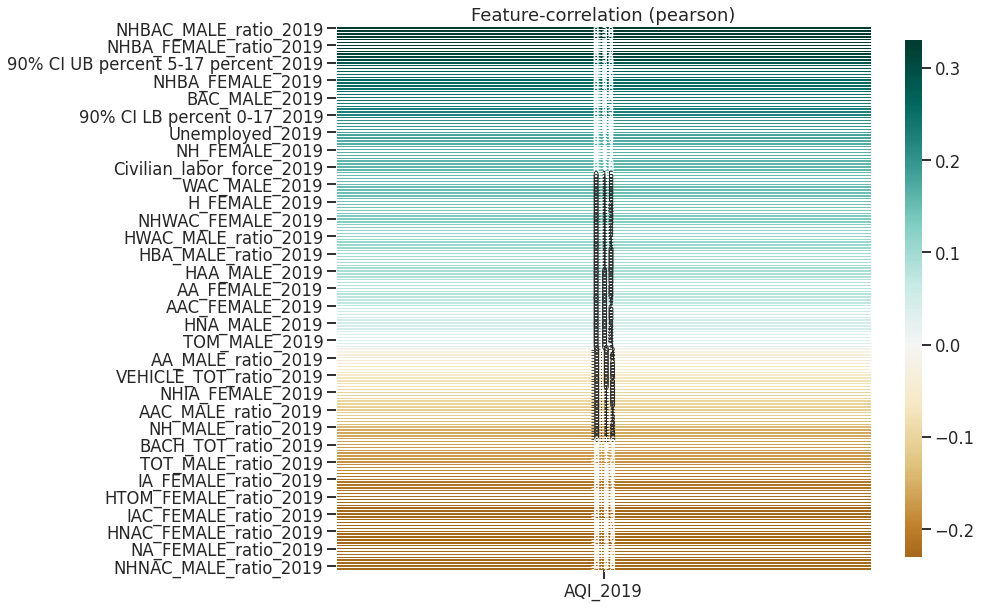

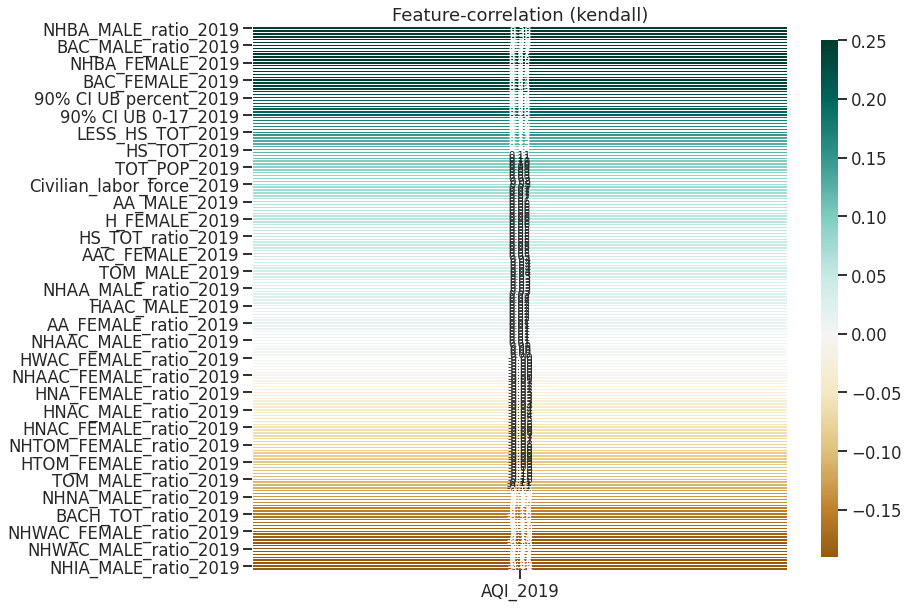

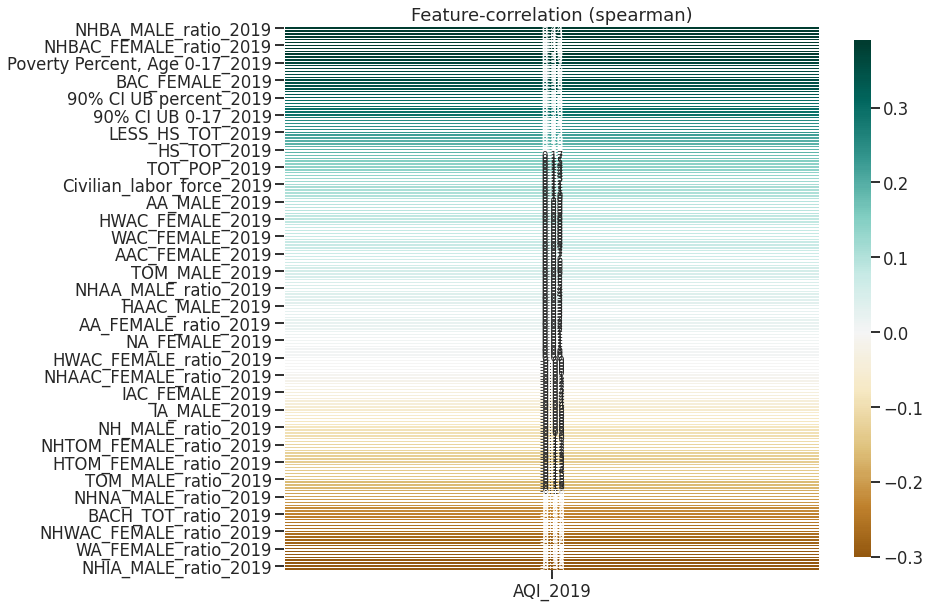

In [19]:
klib.corr_plot(df_2019, target='AQI_2019', method='pearson')
klib.corr_plot(df_2019, target='AQI_2019', method='kendall')
klib.corr_plot(df_2019, target='AQI_2019', method='spearman')

# Merge dataframe into df 2017-2019

In [20]:
pd.set_option('display.max_columns', 200)

df_2017_2018 = pd.merge(df_2017, df_2018, how='inner')
df_2017_2019 = pd.merge(df_2017_2018, df_2019, how='inner')

df_2017_2019

,GeoFIPS,State Name,County Name,AQI_2017,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,"Poverty Estimate, All Ages_2017",90% CI LB All Ages_2017,90% CI UB All Ages_2017,"Poverty Percent, All Ages_2017",90% CI LB percent_2017,90% CI UB percent_2017,"Poverty Estimate, Age 0-17_2017",90% CI LB percent 0-17_2017,90% CI UB 0-17_2017,"Poverty Percent, Age 0-17_2017",90% CI LB percent 0-17 percent_2017,90% CI UB 0-17 percent_2017,"Poverty Estimate, Age 5-17 in Families_2017",90% CI LB 5-17 fam_2017,90% CI UB 5-17 fam_2017,"Poverty Percent, Age 5-17 in Families_2017",90% CI LB 5-17 percent_2017,90% CI UB percent 5-17 percent_2017,Median Household Income_2017,90% CI Lower Bound LB medh inc_2017,90% CI UB medh inc_2017,Personal income (thousands of dollars) 2017,Per capita personal income (dollars) 2017,POP_2017,EDU_TOT_2017,LESS_HS_TOT_2017,HS_TOT_2017,COL_OR_ASSOC_TOT_2017,BACH_TOT_2017,GRAD_TOT_2017,VEHICLE_TOT_2017,EDU_TOT_ratio_2017,LESS_HS_TOT_ratio_2017,HS_TOT_ratio_2017,COL_OR_ASSOC_TOT_ratio_2017,BACH_TOT_ratio_2017,GRAD_TOT_ratio_2017,VEHICLE_TOT_ratio_2017,TOT_POP_2017,TOT_MALE_2017,TOT_FEMALE_2017,WA_MALE_2017,WA_FEMALE_2017,BA_MALE_2017,BA_FEMALE_2017,IA_MALE_2017,IA_FEMALE_2017,AA_MALE_2017,AA_FEMALE_2017,NA_MALE_2017,NA_FEMALE_2017,TOM_MALE_2017,TOM_FEMALE_2017,WAC_MALE_2017,WAC_FEMALE_2017,BAC_MALE_2017,BAC_FEMALE_2017,IAC_MALE_2017,IAC_FEMALE_2017,AAC_MALE_2017,AAC_FEMALE_2017,NAC_MALE_2017,NAC_FEMALE_2017,NH_MALE_2017,NH_FEMALE_2017,NHWA_MALE_2017,NHWA_FEMALE_2017,NHBA_MALE_2017,NHBA_FEMALE_2017,NHIA_MALE_2017,NHIA_FEMALE_2017,NHAA_MALE_2017,NHAA_FEMALE_2017,NHNA_MALE_2017,NHNA_FEMALE_2017,NHTOM_MALE_2017,NHTOM_FEMALE_2017,NHWAC_MALE_2017,NHWAC_FEMALE_2017,NHBAC_MALE_2017,NHBAC_FEMALE_2017,NHIAC_MALE_2017,NHIAC_FEMALE_2017,NHAAC_MALE_2017,NHAAC_FEMALE_2017,NHNAC_MALE_2017,NHNAC_FEMALE_2017,H_MALE_2017,H_FEMALE_2017,HWA_MALE_2017,HWA_FEMALE_2017,HBA_MALE_2017,...,NHAAC_MALE_2019,NHAAC_FEMALE_2019,NHNAC_MALE_2019,NHNAC_FEMALE_2019,H_MALE_2019,H_FEMALE_2019,HWA_MALE_2019,HWA_FEMALE_2019,HBA_MALE_2019,HBA_FEMALE_2019,HIA_MALE_2019,HIA_FEMALE_2019,HAA_MALE_2019,HAA_FEMALE_2019,HNA_MALE_2019,HNA_FEMALE_2019,HTOM_MALE_2019,HTOM_FEMALE_2019,HWAC_MALE_2019,HWAC_FEMALE_2019,HBAC_MALE_2019,HBAC_FEMALE_2019,HIAC_MALE_2019,HIAC_FEMALE_2019,HAAC_MALE_2019,HAAC_FEMALE_2019,HNAC_MALE_2019,HNAC_FEMALE_2019,TOT_MALE_ratio_2019,TOT_FEMALE_ratio_2019,WA_MALE_ratio_2019,WA_FEMALE_ratio_2019,BA_MALE_ratio_2019,BA_FEMALE_ratio_2019,IA_MALE_ratio_2019,IA_FEMALE_ratio_2019,AA_MALE_ratio_2019,AA_FEMALE_ratio_2019,NA_MALE_ratio_2019,NA_FEMALE_ratio_2019,TOM_MALE_ratio_2019,TOM_FEMALE_ratio_2019,WAC_MALE_ratio_2019,WAC_FEMALE_ratio_2019,BAC_MALE_ratio_2019,BAC_FEMALE_ratio_2019,IAC_MALE_ratio_2019,IAC_FEMALE_ratio_2019,AAC_MALE_ratio_2019,AAC_FEMALE_ratio_2019,NAC_MALE_ratio_2019,NAC_FEMALE_ratio_2019,NH_MALE_ratio_2019,NH_FEMALE_ratio_2019,NHWA_MALE_ratio_2019,NHWA_FEMALE_ratio_2019,NHBA_MALE_ratio_2019,NHBA_FEMALE_ratio_2019,NHIA_MALE_ratio_2019,NHIA_FEMALE_ratio_2019,NHAA_MALE_ratio_2019,NHAA_FEMALE_ratio_2019,NHNA_MALE_ratio_2019,NHNA_FEMALE_ratio_2019,NHTOM_MALE_ratio_2019,NHTOM_FEMALE_ratio_2019,NHWAC_MALE_ratio_2019,NHWAC_FEMALE_ratio_2019,NHBAC_MALE_ratio_2019,NHBAC_FEMALE_ratio_2019,NHIAC_MALE_ratio_2019,NHIAC_FEMALE_ratio_2019,NHAAC_MALE_ratio_2019,NHAAC_FEMALE_ratio_2019,NHNAC_MALE_ratio_2019,NHNAC_FEMALE_ratio_2019,H_MALE_ratio_2019,H_FEMALE_ratio_2019,HWA_MALE_ratio_2019,HWA_FEMALE_ratio_2019,HBA_MALE_ratio_2019,HBA_FEMALE_ratio_2019,HIA_MALE_ratio_2019,HIA_FEMALE_ratio_2019,HAA_MALE_ratio_2019,HAA_FEMALE_ratio_2019,HNA_MALE_ratio_2019,HNA_FEMALE_ratio_2019,HTOM_MALE_ratio_2019,HTOM_FEMALE_ratio_2019,HWAC_MALE_ratio_2019,HWAC_FEMALE_ratio_2019,HBAC_MALE_ratio_2019,HBAC_FEMALE_ratio_2019,HIAC_MALE_ratio_2019,HIAC_FEMALE_ratio_2019,HAAC_MALE_ratio_2019,HAAC_FEMALE_ratio_2019,HNAC_MALE_ratio_2019,HNAC_FEMALE_ratio_2019
0,1003,Alabama,Baldwin,30.218182,92456,88711,3745,4.1,21199.0,17444.0,24954.0,10.1,8.3

# save data


In [21]:
# save 2017-2019 dataset
# data_path = r'../../data/processed/all_pm2_5_df_2017_2019'
# df_2017_2019.to_csv(data_path, index=False)
#
# save datasets for individual years
data_path = r'../../data/processed/all_pm2_5_df_2017'
df_2017.to_csv(data_path, index=False)
data_path = r'../../data/processed/all_pm2_5_df_2018'
df_2018.to_csv(data_path, index=False)
data_path = r'../../data/processed/all_pm2_5_df_2019'
df_2019.to_csv(data_path, index=False)

In [22]:
display(df_2017.corr()['AQI_2017'].sort_values().tail(15))
display(df_2018.corr()['AQI_2018'].sort_values().tail(15))
display(df_2019.corr()['AQI_2019'].sort_values().tail(15))

H_FEMALE_ratio_2017                           0.255842
HWAC_FEMALE_ratio_2017                        0.260375
HWA_FEMALE_ratio_2017                         0.263328
H_MALE_ratio_2017                             0.272559
90% CI UB 0-17 percent_2017                   0.274504
HWAC_MALE_ratio_2017                          0.277101
HWA_MALE_ratio_2017                           0.280381
90% CI UB percent 5-17 percent_2017           0.280564
Poverty Percent, Age 0-17_2017                0.289689
Poverty Percent, Age 5-17 in Families_2017    0.295624
90% CI LB percent 0-17 percent_2017           0.303269
Unemployment_rate_2017                        0.305500
90% CI LB 5-17 percent_2017                   0.308288
LESS_HS_TOT_ratio_2017                        0.359875
AQI_2017                                      1.000000
Name: AQI_2017, dtype: float64

90% CI LB percent 0-17 percent_2018    0.247136
HIAC_FEMALE_ratio_2018                 0.248516
HIA_MALE_ratio_2018                    0.251887
HIAC_MALE_ratio_2018                   0.252660
HAA_MALE_ratio_2018                    0.253884
90% CI LB 5-17 percent_2018            0.257822
Unemployment_rate_2018                 0.289689
H_FEMALE_ratio_2018                    0.304873
HWAC_FEMALE_ratio_2018                 0.307452
HWA_FEMALE_ratio_2018                  0.309078
H_MALE_ratio_2018                      0.320788
HWAC_MALE_ratio_2018                   0.323817
HWA_MALE_ratio_2018                    0.325822
LESS_HS_TOT_ratio_2018                 0.361518
AQI_2018                               1.000000
Name: AQI_2018, dtype: float64

90% CI UB 0-17 percent_2019                   0.284938
90% CI UB percent 5-17 percent_2019           0.285162
Poverty Percent, Age 5-17 in Families_2019    0.303253
Poverty Percent, Age 0-17_2019                0.307555
90% CI LB 5-17 percent_2019                   0.317356
90% CI LB percent 0-17 percent_2019           0.328620
BA_FEMALE_ratio_2019                          0.369615
NHBA_FEMALE_ratio_2019                        0.370391
BAC_FEMALE_ratio_2019                         0.371851
NHBAC_FEMALE_ratio_2019                       0.373632
BA_MALE_ratio_2019                            0.378297
NHBA_MALE_ratio_2019                          0.379315
BAC_MALE_ratio_2019                           0.379930
NHBAC_MALE_ratio_2019                         0.382157
AQI_2019                                      1.000000
Name: AQI_2019, dtype: float64

In [23]:
display(df_2017.corr()['AQI_2017'].sort_values().head(15))
display(df_2018.corr()['AQI_2018'].sort_values().head(15))
display(df_2019.corr()['AQI_2019'].sort_values().head(15))

NHWAC_MALE_ratio_2017     -0.315268
NHWA_MALE_ratio_2017      -0.305379
NHWAC_FEMALE_ratio_2017   -0.300067
NHWA_FEMALE_ratio_2017    -0.290883
NH_MALE_ratio_2017        -0.285940
NH_FEMALE_ratio_2017      -0.240508
BACH_TOT_ratio_2017       -0.191993
NHIAC_MALE_ratio_2017     -0.189528
NHIAC_FEMALE_ratio_2017   -0.188030
GRAD_TOT_ratio_2017       -0.186893
NHIA_FEMALE_ratio_2017    -0.184356
NHIA_MALE_ratio_2017      -0.183624
VEHICLE_TOT_ratio_2017    -0.176906
WAC_FEMALE_ratio_2017     -0.165373
90% CI UB medh inc_2017   -0.159335
Name: AQI_2017, dtype: float64

NH_MALE_ratio_2018        -0.327039
NHWAC_MALE_ratio_2018     -0.319859
NHWA_MALE_ratio_2018      -0.313156
NHWAC_FEMALE_ratio_2018   -0.308861
NHWA_FEMALE_ratio_2018    -0.302692
NH_FEMALE_ratio_2018      -0.295639
EDU_TOT_ratio_2018        -0.206828
NHIA_FEMALE_ratio_2018    -0.184404
GeoFIPS                   -0.184012
NHIA_MALE_ratio_2018      -0.183904
NHIAC_MALE_ratio_2018     -0.182882
NHIAC_FEMALE_ratio_2018   -0.181297
VEHICLE_TOT_ratio_2018    -0.167803
BACH_TOT_ratio_2018       -0.164652
IA_FEMALE_ratio_2018      -0.145205
Name: AQI_2018, dtype: float64

NHNA_MALE_ratio_2019      -0.280108
NHNAC_MALE_ratio_2019     -0.279563
NHNA_FEMALE_ratio_2019    -0.277822
NHNAC_FEMALE_ratio_2019   -0.277473
NAC_MALE_ratio_2019       -0.275660
NA_MALE_ratio_2019        -0.275461
NAC_FEMALE_ratio_2019     -0.274111
NA_FEMALE_ratio_2019      -0.273879
TOM_MALE_ratio_2019       -0.271216
NHTOM_MALE_ratio_2019     -0.268381
TOM_FEMALE_ratio_2019     -0.260110
NHWAC_MALE_ratio_2019     -0.257452
NHTOM_FEMALE_ratio_2019   -0.254904
HNAC_FEMALE_ratio_2019    -0.251795
HNAC_MALE_ratio_2019      -0.250004
Name: AQI_2019, dtype: float64

In [24]:
display(df_2017.shape)
display(df_2018.shape)
display(df_2019.shape)

(408, 191)

(408, 191)

(408, 191)

# Result
Correlation appears higher for pm2.5 data

## postive covariance
We see that more that individuals that graduate with less than hs education have a moderate-weak correlation with pm2.5
pollutant. We also see some correlation with unemployment and poverty percentages; we also some HWA, H_MALE demographics.
IN 2019 data we see BA and NHBAC male demographics have moderate positive covariance. Also some HIA and HIAC are shown to have
weak positive covariance with pollution levels
* HWAC - Hispanic, White alone or in combination
* HWA - Hispanic, White alone
* H - Hispanic
* BA - Black or african american alone
* NHBAC - Not Hispanic, Black or African American alone or in combination
## negative covariance
We see common pattern that NH demographics have moderate-weak covariance with pollution levels.
We see more ethnicity features for negative covariances but some education and incoem are present.
Counties with higher vehicle ratio in population and more bachelor graduates have negative covariance.
Also some negative coveraince with median household income.
